In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import re
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
from soynlp.normalizer import *
import squarify



In [92]:
zoom = pd.read_csv("data/zoom_s4.csv",index_col=0)
print(zoom.shape)
zoom.head()

(10366, 6)


,Date,Time,Author,Content,Label,Proba
8889,2022-11-09,11:30:23,AI_15_최준영,안녕하세요,0,0.481098
8890,2022-11-09,11:30:25,AI_15_이도연,안녕하세용,0,0.481098
8891,2022-11-09,11:30:25,AI_15_이태섭,안녕하세요,0,0.481098
8892,2022-11-09,11:30:30,AI_15_전현아,안녕하세요~,0,0.481098
8893,2022-11-09,11:30:32,AI_15_윤종률,안녕하세요,0,0.481098


In [93]:
def sprint(x):
    spr = 0
    if x <= "2022-11-15" :
        spr = 1
    elif x <= "2022-11-22":
        spr = 2
    elif x <= "2022-11-29":
        spr = 3
    return spr
    
zoom["Sprint"] = zoom["Date"].map(sprint)


In [94]:
zoom = zoom[zoom.Sprint > 0]
zoom.tail()

,Date,Time,Author,Content,Label,Proba,Sprint
19201,2022-11-29,18:03:51,AI_15_김민지,👏👏👏👏👏,1,0.515453,3
19202,2022-11-29,18:03:51,AI_15_신희호,감사합니다,1,0.888453,3
19203,2022-11-29,18:03:52,AI_15_장선영,감사합니다!,1,0.888453,3
19204,2022-11-29,18:03:53,AI_15_이상필,수고 많으셨습니다~~~~^0^,1,0.683218,3
19205,2022-11-29,18:03:53,AI_15_최준영,설문?,0,0.497075,3


In [95]:
zoom_sprint_avg = zoom.groupby(by="Sprint").mean()
zoom_sprint_avg

,Label,Proba
Sprint,,
1,0.770691,0.544890
2,0.799297,0.544638
3,0.764558,0.546589


In [98]:
zoom["Label"].value_counts()

1    8011
0    2299
Name: Label, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2022-11-09'),
  Text(1, 0, '2022-11-10'),
  Text(2, 0, '2022-11-11'),
  Text(3, 0, '2022-11-14'),
  Text(4, 0, '2022-11-15'),
  Text(5, 0, '2022-11-16'),
  Text(6, 0, '2022-11-17'),
  Text(7, 0, '2022-11-18'),
  Text(8, 0, '2022-11-21'),
  Text(9, 0, '2022-11-22'),
  Text(10, 0, '2022-11-23'),
  Text(11, 0, '2022-11-24'),
  Text(12, 0, '2022-11-25'),
  Text(13, 0, '2022-11-28'),
  Text(14, 0, '2022-11-29')])

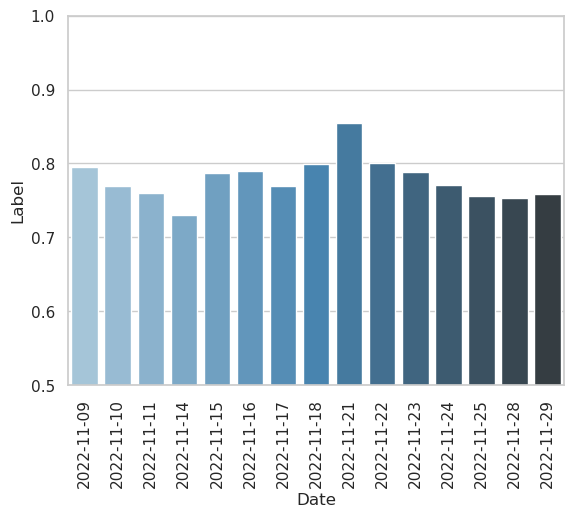

In [103]:
zoom_label_avg = zoom.groupby(by="Date").mean()
# zoom_label_avg
# sns.barplot(zoom_label_avg,x=zoom_label_avg.index,y="Label")
# plt.xticks(rotation=45)

sns.set(style="whitegrid", color_codes=True)

data = zoom_label_avg["Label"]  # data underlying bar plot in question

# pal = sns.color_palette("Blues_d", len(data))
# rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette="Blues_d")
plt.ylim(0.5,1)
plt.xticks(rotation=90)

In [99]:
zoom_label_avg["Label"]

Date
2022-11-09    0.794737
2022-11-10    0.769231
2022-11-11    0.760060
2022-11-14    0.730361
2022-11-15    0.787234
2022-11-16    0.789954
2022-11-17    0.768939
2022-11-18    0.799462
2022-11-21    0.854881
2022-11-22    0.800487
2022-11-23    0.789157
2022-11-24    0.771429
2022-11-25    0.755747
2022-11-28    0.753425
2022-11-29    0.758511
Name: Label, dtype: float64

In [77]:
zoom.shape

(10310, 7)

In [14]:
zoom["Author"].value_counts()

AI_15_전지원    1609
AI_15_이상필    1360
AI_15_이진우     658
AI_15_윤종률     403
AI_15_박건후     392
             ... 
AI_15_김건        2
AI_15_김재희       1
ai_15_윤현욱       1
AI_15_유재현       1
AI_15_장문정       1
Name: Author, Length: 69, dtype: int64

In [105]:
len(zoom["Author"].unique())

69

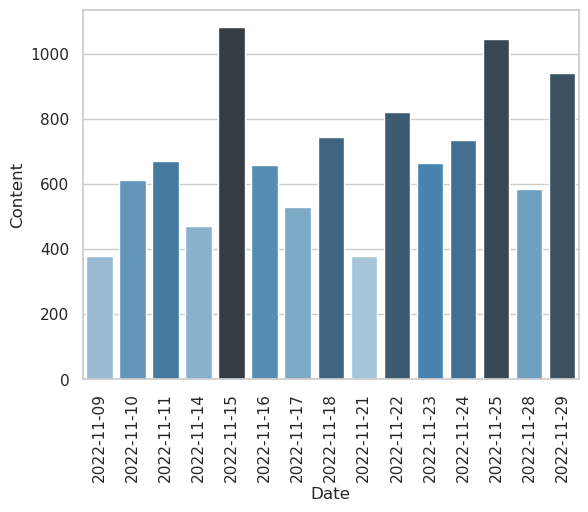

In [75]:
zoom_count = zoom.groupby(by="Date").count()
sns.set(style="whitegrid", color_codes=True)

data = zoom_count["Content"]  # data underlying bar plot in question

pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette=np.array(pal[::1])[rank])
temp = plt.xticks(rotation=90)


In [ ]:





# pal = sns.color_palette("Greens_d", np.max(zoom_count["Content"]))
# rank = zoom_count.argsort().argsort()  
# sns.barplot(x=zoom_count.index, y="Content", palette=np.array(pal[::-1])[rank])


# diverging_colors = sns.color_palette("RdBu", 10)
# dark_palette = sns.dark_palette("#69d", reverse=True)
# sns.barplot(zoom_count,x=zoom_label_avg.index,y="Content")
# c = size,cmap = "viridis"
# sns.palplot(diverging_colors)
# sns.set_palette(palette)

# plt.xticks()
plt.xticks(rotation=45)



In [8]:
#리뷰 전체길이 확인
zoom_length = zoom['Content'].astype(str).apply(len)
zoom_length.head()

8889    5
8890    5
8891    5
8892    6
8893    5
Name: Content, dtype: int64

In [9]:
# 채팅 길이 통계
print('채팅 길이 최댓값: {}'.format(np.max(zoom_length)))
print('채팅 길이 최솟값: {}'.format(np.min(zoom_length)))
print('채팅 길이 평균값: {}'.format(np.mean(zoom_length)))
print('채팅 길이 표준편차: {}'.format(np.std(zoom_length)))
print('채팅 길이 중간값: {}'.format(np.median(zoom_length)))
print('채팅 길이 1사분위: {}'.format(np.percentile(zoom_length,25)))
print('채팅 길이 3사분위: {}'.format(np.percentile(zoom_length,75)))

채팅 길이 최댓값: 195
채팅 길이 최솟값: 1
채팅 길이 평균값: 9.559553831231813
채팅 길이 표준편차: 10.910236581511572
채팅 길이 중간값: 6.0
채팅 길이 1사분위: 3.0
채팅 길이 3사분위: 12.0


In [10]:
okt = Okt()

def clean_text(text):
    # corpus = []
    # for i in range(0, len(texts)):
    #     review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
    #     review = re.sub(r'\d+','', str(texts[i]))# remove number
    #     review = review.lower() #lower case
    #     review = re.sub(r'\s+', ' ', review) #remove extra space
    #     review = re.sub(r'<[^>]+>','',review) #remove Html tags
    #     review = re.sub(r'\s+', ' ', review) #remove spaces
    #     review = re.sub(r"^\s+", '', review) #remove space from start
    #     review = re.sub(r'\s+$', '', review) #remove space from the end
    #     corpus.append(review)
    
    text = repeat_normalize(text, num_repeats=1)

    # x = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣0-9\\s ]','', x)
    text = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',text) #remove punctuation
    text = re.sub(r'\d+','', text)# remove number
    text = text.lower() #lower case
    text = re.sub(r'\s+', ' ', text) #remove extra space
    text = re.sub(r'<[^>]+>','',text) #remove Html tags
    text = re.sub(r'\s+', ' ', text) #remove spaces
    text = re.sub(r"^\s+", '', text) #remove space from start
    text = re.sub(r'\s+$', '', text) #remove space from the end
    text = re.sub(r'[^👍👏🐍ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', text)

    text = re.sub(r'[👏]+', '👏', text)
    text = re.sub(r'[👍]+', '👍', text)
    text = re.sub(r'[🐍]+', '🐍', text)
    # text = re.sub(r'[ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', text)
    # text = re.sub(r'[a-zA-Z\\s ]','', text)

    stopwords = ['은','는','이','가','하','아','것','들','의','요','을',
                    '있','되','수','보','주','등','한','에','님','를'] # 불용어 추가할 것이 있으면 이곳에 추가
    text = okt.morphs(text, stem=True) # 토큰화
    text = [word for word in text if not word in stopwords] # 불용어 제거

    return text
tokens = zoom["Content"].map(clean_text)

In [11]:
tokens

8889       [안녕하다]
8890       [안녕하다]
8891       [안녕하다]
8892       [안녕하다]
8893       [안녕하다]
           ...   
19201         [👏]
19202      [감사하다]
19203      [감사하다]
19204    [수고, 많다]
19205        [설문]
Name: Content, Length: 10310, dtype: object

In [12]:
train_review = []
for i in tokens:
    for j in i:
        train_review.append(j)
# 문자열 아닌 데이터 모두 제거
# train_review = [review for review in zoom["Content"]]
train_review

['안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '안녕하다',
 '근데',
 '만',
 '기준',
 '축의',
 '값',
 '인',
 '같다',
 '너무',
 '완전',
 '다른',
 '함수',
 '인거',
 '아니다',
 '다',
 '기준',
 '인거',
 '군',
 '넵',
 '감사하다',
 '컬럼',
 '개수',
 '노드',
 '수이',
 '면',
 '테이블',
 '에서',
 '입력',
 '층',
 '개수',
 '무엇',
 '과',
 '연관',
 '되다',
 '은닉',
 '층',
 'ㅎㅎ',
 '감사하다',
 '시간',
 '초과',
 '되어다',
 '괜',
 '차다',
 '밥',
 '조금',
 '늦다',
 '먹다',
 '되다',
 'ㅋ',
 '오',
 '신',
 '기능',
 '앗',
 '잘',
 '못',
 '하다',
 'ㅎ',
 '맛점',
 '하다',
 '감사하다',
 '감사하다',
 '고생',
 '하다',
 '감사하다',
 '고생',
 '하다',
 '수고',
 '하다',
 '수고',
 '하다',
 '수고',
 '하다',
 '감사하다',
 '점심',
 '맛있다',
 '들다',
 '감사하다',
 '감사하다',
 '감사하다',
 '감사하다',
 '감사하다',
 '고생',
 '하다',
 '감사하다',
 '감사하다',
 '👏',
 '고생',
 '하다',
 '감사하다',
 '감사하다',
 '감사하다',
 '귀',
 '쏙쏙',
 '들어오다',
 '설명',
 '감사하다',
 '수고',
 '많다',
 '어렵다',
 '설명',
 '정말',
 '감사하다',
 '네',
 '잠시',
 '제',
 '확인',
 '해드리다',
 '읽다',
 '기만',
 '하고',
 '쓰다',
 '못',
 '하다',
 '혹시',
 '어떻다',
 '하다',
 '되다',
 '혹시',
 '저',
 '조로',
 '좀',
 '보내다

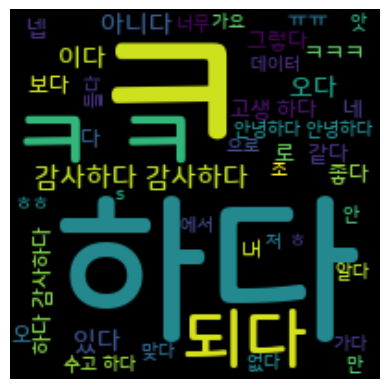

In [13]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud('data/NanumSquareRoundB.ttf',
    max_words=50,width=200,height=200,max_font_size=100,min_font_size=10,).generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
word_counts = Counter()
tokens.apply(lambda x: word_counts.update(x))
word_counts.most_common(100)

[('👏', 1401),
 ('ㅋ', 1115),
 ('하다', 707),
 ('감사하다', 442),
 ('되다', 180),
 ('도', 153),
 ('있다', 150),
 ('오다', 141),
 ('이다', 139),
 ('아니다', 138),
 ('넵', 127),
 ('👍', 127),
 ('s', 126),
 ('같다', 124),
 ('고생', 121),
 ('안녕하다', 114),
 ('좋다', 114),
 ('저', 112),
 ('네', 111),
 ('오', 107),
 ('다', 106),
 ('로', 98),
 ('으로', 90),
 ('ㅠㅠ', 89),
 ('보다', 86),
 ('그렇다', 83),
 ('들다', 78),
 ('ㅋㅋㅋ', 78),
 ('조', 77),
 ('안', 77),
 ('수고', 74),
 ('만', 72),
 ('에서', 69),
 ('너무', 68),
 ('이해', 67),
 ('맞다', 66),
 ('가다', 63),
 ('데이터', 62),
 ('오늘', 58),
 ('돌리다', 57),
 ('알다', 57),
 ('해주다', 56),
 ('더', 55),
 ('개', 54),
 ('거', 54),
 ('ㅎ', 53),
 ('없다', 53),
 ('ㅎㅎ', 52),
 ('학습', 52),
 ('가요', 52),
 ('앗', 51),
 ('코치', 51),
 ('자다', 51),
 ('값', 49),
 ('못', 49),
 ('나오다', 49),
 ('헉', 48),
 ('ㅋㅋ', 48),
 ('많다', 46),
 ('아하', 46),
 ('않다', 45),
 ('역전', 45),
 ('가중', 44),
 ('그', 43),
 ('죠', 42),
 ('설명', 41),
 ('🐍', 41),
 ('인가요', 41),
 ('어렵다', 39),
 ('박수', 39),
 ('멋지다', 39),
 ('건가', 39),
 ('게', 38),
 ('사람', 38),
 ('좀', 37),
 ('번', 37),
 ('

In [138]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [140]:
wc = word_count(tokens)
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
57,👏,1395,1401,1.0,0.068129,0.068129,0.135306
38,ㅋ,1106,1115,2.0,0.054221,0.122350,0.107274
50,하다,642,707,3.0,0.034380,0.156730,0.062270
17,감사하다,437,442,4.0,0.021494,0.178224,0.042386
20,되다,172,180,5.0,0.008753,0.186977,0.016683
103,도,150,153,6.0,0.007440,0.194417,0.014549
79,있다,143,150,7.0,0.007294,0.201712,0.013870
125,오다,140,141,8.0,0.006857,0.208568,0.013579
256,이다,138,139,9.0,0.006759,0.215328,0.013385
13,아니다,138,138,10.0,0.006711,0.222039,0.013385


<AxesSubplot:xlabel='rank', ylabel='cul_percent'>

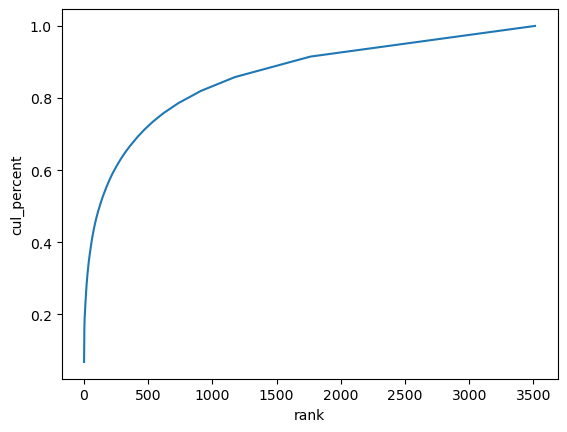

In [142]:
sns.lineplot(x='rank', y='cul_percent', data=wc)

In [143]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.832814627504373